In [1]:
import io
import spotipy

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import pandas as pd

from collections import Counter, OrderedDict
from spotipy.oauth2 import SpotifyOAuth

['The Weeknd', 'Future', 'YENA', 'Bryson Tiller', 'PARTYNEXTDOOR', 'JO YURI', 'Drake', 'Giveon', 'Chase Atlantic', 'Khalid', 'IZ*ONE', 'OH MY GIRL', 'PSY', 'DEAN', 'TAEYEON', 'GSoul', 'Ariana Grande', 'Lady Gaga', 'The Rolling Stones', 'ABBA', 'Red Velvet', 'SUPER JUNIOR', 'f(x)', 'JAY-Z']
['PARTYNEXTDOOR', 'The Weeknd', 'Future', 'Drake', 'Bryson Tiller', 'Khalid', 'YENA', 'Giveon', 'Kehlani', 'Rihanna', 'Chase Atlantic', 'Leessang', 'Red Velvet', 'Ariana Grande', 'Justin Bieber', 'DEAN', 'IU', 'keshi', 'Lady Gaga', '6LACK', 'Glee Cast', 'TAEYEON', 'ABBA', 'Kendrick Lamar', 'Loco', 'f(x)', 'JO YURI', 'Arin Ray', 'Post Malone', 'JAY-Z', 'Paul Kim', 'Kanye West', 'Bruno Mars', 'dvsn', 'Coldplay', 'T-Pain', 'Urban Zakapa', 'GSoul', 'Crush', 'Chris Brown', 'aespa', 'Dave', "Girls' Generation", 'Taylor Swift', 'KARA', 'Lee Seung Chul', 'J. Cole', 'Maroon 5', 'Epik High', 'A$AP Rocky']
['Red Velvet', 'The Weeknd', 'Future', 'Bryson Tiller', 'Drake', 'IU', 'Ariana Grande', 'PARTYNEXTDOOR', '

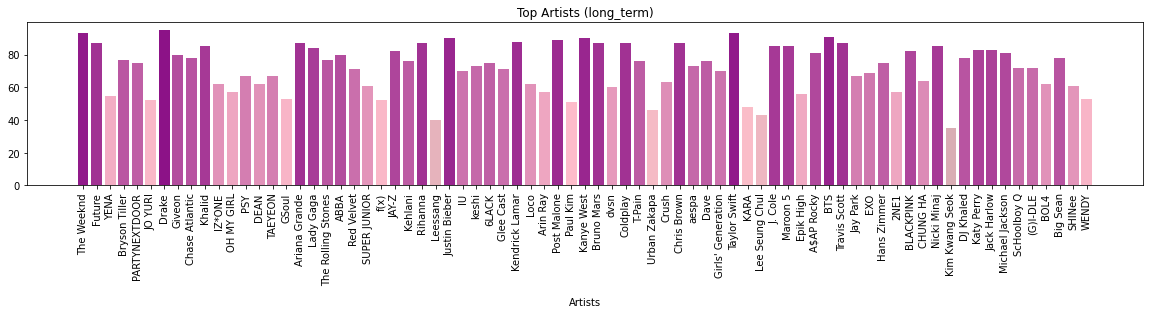

In [4]:
scope = 'user-top-read'
ranges = ['short_term', 'medium_term', 'long_term']

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))


sml = []
pop = [],[],[]
artist = [],[],[]
terms = ['short_term', 'medium_term', 'long_term']
pop_score = 0

for i in range(3):

    results = sp.current_user_top_artists(time_range=terms[i], limit=50)

    for j, item in enumerate(results['items']):
        popularity = item['popularity']
        pop_score += popularity
        artist[i].append(item['name'])
        pop[i].append(popularity)
    sml.append(popularity)

plt.rcParams["figure.figsize"] = (20,3)

for i in range(3):
    print(artist[i])
    df = pd.DataFrame({"x" : pop[i]})

    cmap = mcolors.LinearSegmentedColormap.from_list("", ["grey", "pink", "purple"])
    
    plt.bar(artist[i], df["x"], color=cmap(df.x.values/100))
    plt.xlabel('Artists', labelpad=12)
    plt.xticks(rotation=90)
    
    plt.title("Top Artists ("  + terms[i] + ")")


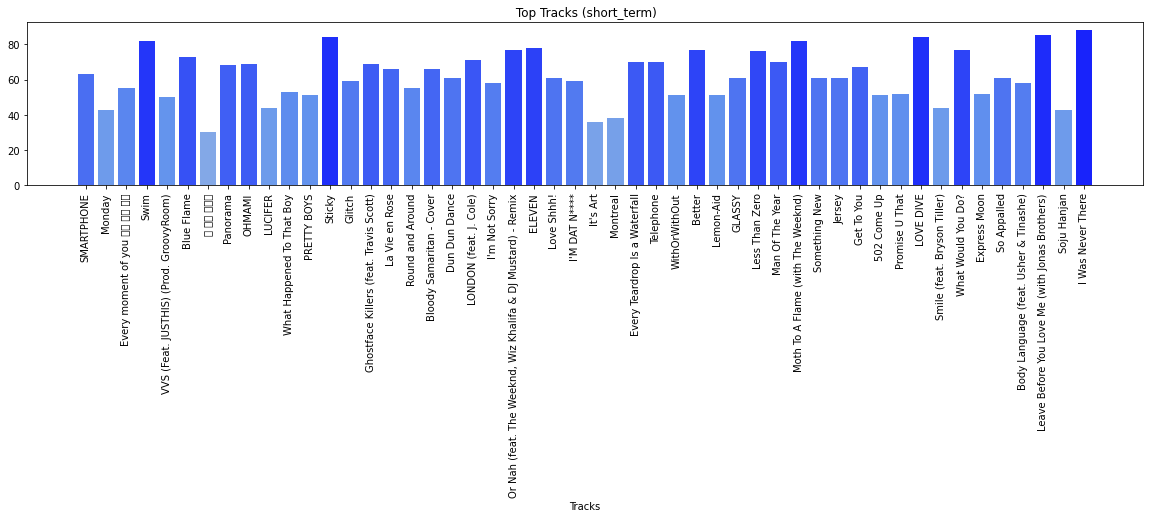

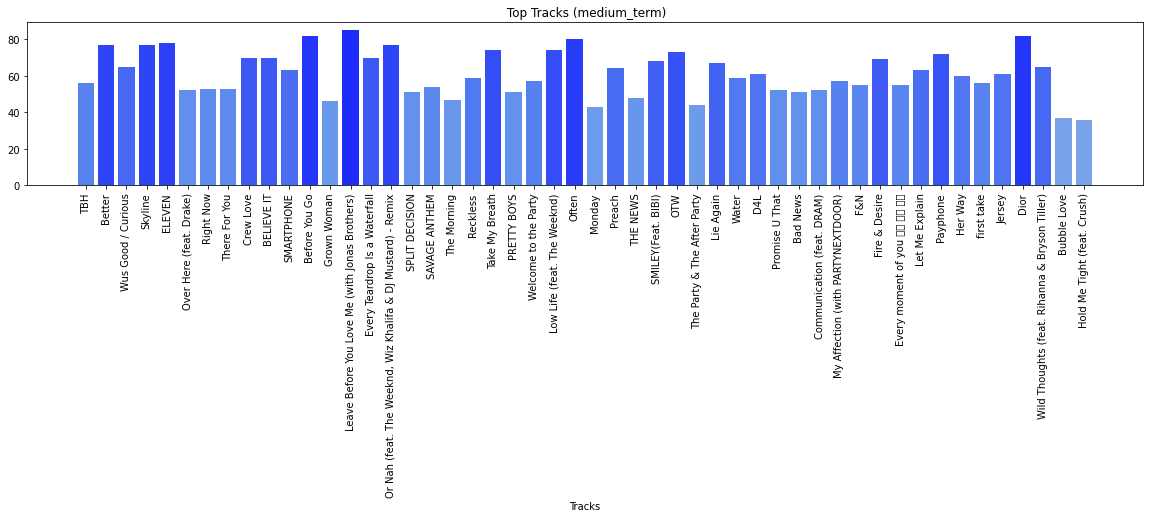

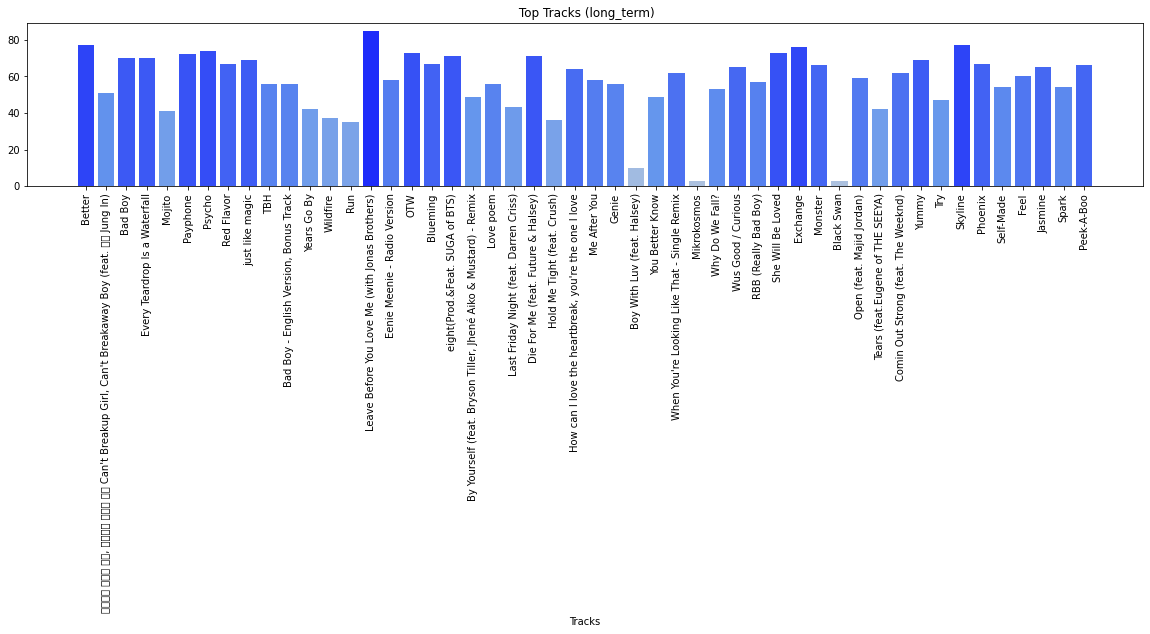

In [6]:
artists = [],[],[]
tracks = [],[],[]
track_pop = [],[],[]

for i in range(3):
    results = sp.current_user_top_tracks(limit=50,offset=0,time_range=terms[i])
    
    text = ""
        
    for j, item in enumerate(results['items']):
        popularity = item['popularity']
        track = item['name']
        track_pop[i].append(popularity)
        tracks[i].append(track)
        
        target = item['artists']
        name = target[0]
        artist = name['name']
        artists[i].append(artist)
        
    df2 = pd.DataFrame({"x" : track_pop[i]})

    cmap = mcolors.LinearSegmentedColormap.from_list("", ["lightsteelblue", "cornflowerblue", "blue"])
    
    plt.bar(tracks[i], df2["x"], color=cmap(df2.x.values/100))
    plt.xlabel('Tracks', fontsize=10)
    plt.xticks(rotation=90)
    plt.title(" Top Tracks (" + terms[i] + ")")
    plt.show()

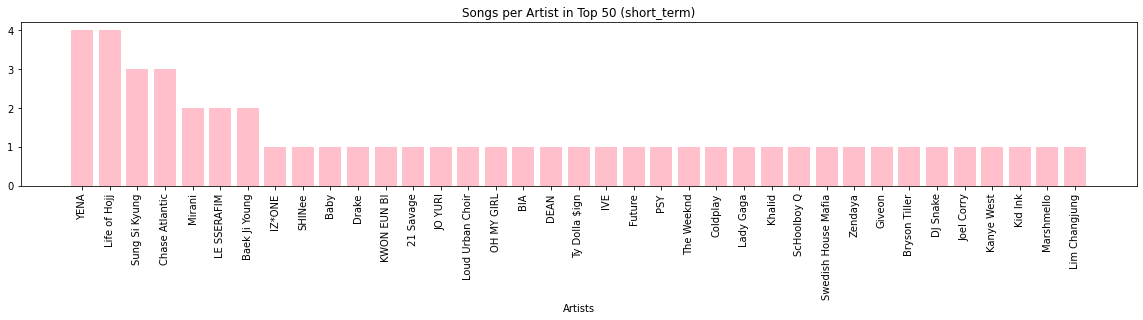

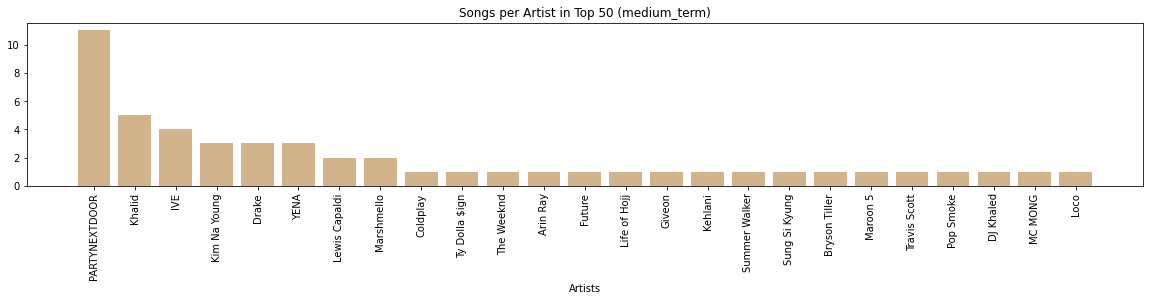

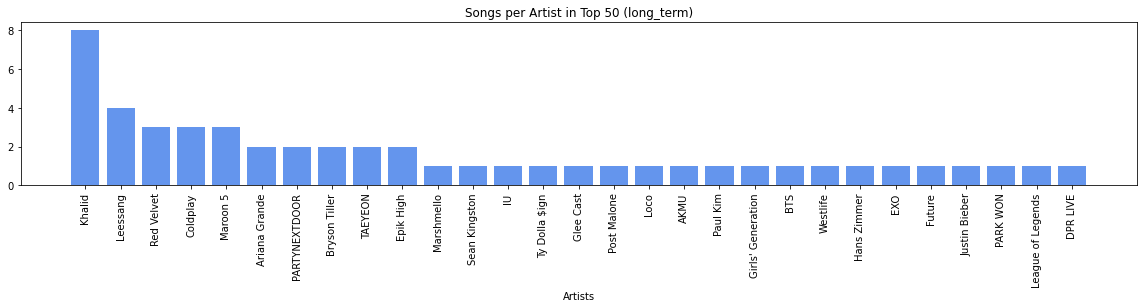

<Figure size 1440x216 with 0 Axes>

In [7]:
colors = ['pink','tan','cornflowerblue']

for i, artist in enumerate(artists):
    df3 = pd.DataFrame(artist)
    c = Counter(df3[0])
    y = OrderedDict(c.most_common())
    df4 = pd.DataFrame({"x" : c})
    plt.bar(c.keys(), y.values(),color=colors[i])
    plt.xticks(rotation=90)

    plt.xlabel('Artists', fontsize=10)
    plt.title("Songs per Artist in Top 50 (" + terms[i] + ")")
    plt.show()
    if i == 2:
        buf = io.BytesIO()
        plt.savefig(buf, format = 'png')
        buf.seek(0)
    